APARTAT 2

Correlació PIB en salut - Esperança de vida: 0.24
Correlació PIB en salut - Mortalitat infantil: -0.25


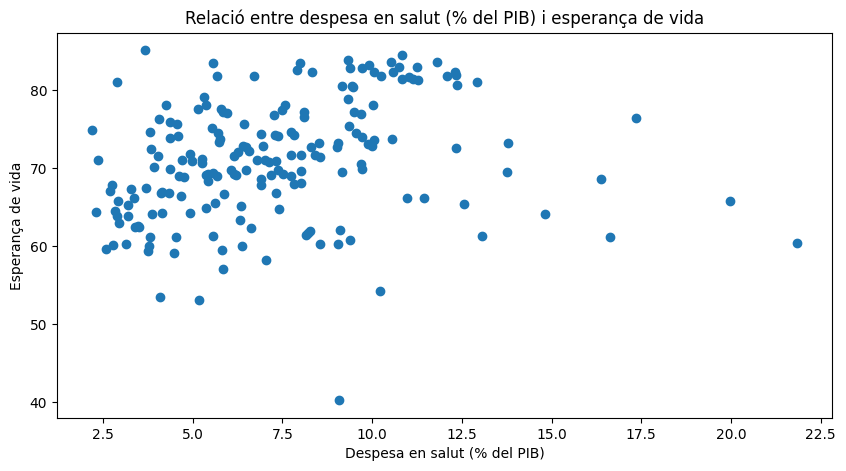

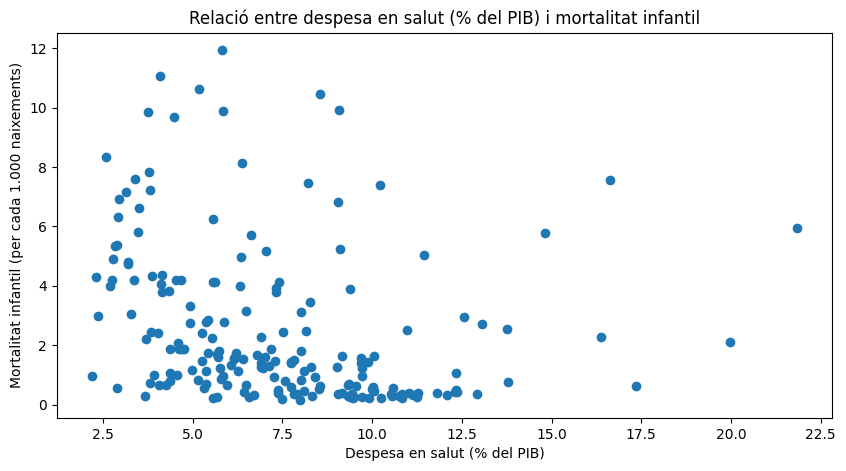

Correlació ponderada PIB en salut - Esperança de vida: 0.41
Correlació ponderada PIB en salut - Mortalitat infantil: -0.26


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Enllaços als datasets
health_exp_url = "https://raw.githubusercontent.com/tnavarrete-iedib/bigdata-24-25/refs/heads/main/total-healthcare-expenditure-gdp.csv"
life_exp_url = "https://raw.githubusercontent.com/tnavarrete-iedib/bigdata-24-25/refs/heads/main/life-expectancy-unwpp.csv"
child_mortality_url = "https://raw.githubusercontent.com/tnavarrete-iedib/bigdata-24-25/refs/heads/main/child-mortality-igme.csv"
population_url = "https://raw.githubusercontent.com/tnavarrete-iedib/bigdata-24-25/refs/heads/main/population-and-demography.csv"

# Carrega de dades
health_exp = pd.read_csv(health_exp_url)
life_exp = pd.read_csv(life_exp_url)
child_mortality = pd.read_csv(child_mortality_url)
population = pd.read_csv(population_url)

# Filtre de dades per l'any 2021
health_exp = health_exp[(health_exp['Year'] == 2021) & (health_exp['Code'].notna())]
life_exp = life_exp[(life_exp['Year'] == 2021) & (life_exp['Code'].notna())]
child_mortality = child_mortality[(child_mortality['Year'] == 2021) & (child_mortality['Code'].notna())]
population = population[(population['Year'] == 2021) & (population['Code'].notna())]

# Combinar els datasets per codi de país
df = health_exp[['Code', 'Entity', 'Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)']].merge(
    life_exp[['Code', 'Life expectancy - Sex: all - Age: 0 - Variant: estimates']], on='Code'
).merge(
    child_mortality[['Code', 'Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births']], on='Code'
).merge(
    population[['Code', 'Population - Sex: all - Age: all - Variant: estimates']], on='Code'
)

# Filtre per evitar països sense dades en les tres variables
df.dropna(inplace=True)


# Calcular els coeficients de correlació
corr_health_life, _ = pearsonr(df['Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)'], df['Life expectancy - Sex: all - Age: 0 - Variant: estimates'])
corr_health_mortality, _ = pearsonr(df['Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)'], df['Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births'])

print(f"Correlació PIB en salut - Esperança de vida: {corr_health_life:.2f}")
print(f"Correlació PIB en salut - Mortalitat infantil: {corr_health_mortality:.2f}")

# Gràfic de dispersió per PIB en salut i esperança de vida
plt.figure(figsize=(10, 5))
plt.scatter(x='Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)', y='Life expectancy - Sex: all - Age: 0 - Variant: estimates', data=df)
plt.title("Relació entre despesa en salut (% del PIB) i esperança de vida")
plt.xlabel("Despesa en salut (% del PIB)")
plt.ylabel("Esperança de vida")
plt.show()

# Gràfic de dispersió per PIB en salut i mortalitat infantil
plt.figure(figsize=(10, 5))
plt.scatter(x='Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)', y='Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births', data=df)
plt.title("Relació entre despesa en salut (% del PIB) i mortalitat infantil")
plt.xlabel("Despesa en salut (% del PIB)")
plt.ylabel("Mortalitat infantil (per cada 1.000 naixements)")
plt.show()

def weighted_corr(x, y, w):
    """Càlcul del coeficient de correlació ponderat."""
    mx = np.average(x, weights=w)
    my = np.average(y, weights=w)
    cov_xy = np.sum(w * (x - mx) * (y - my)) / np.sum(w)
    var_x = np.sum(w * (x - mx)**2) / np.sum(w)
    var_y = np.sum(w * (y - my)**2) / np.sum(w)
    return cov_xy / np.sqrt(var_x * var_y)

# Correlacions ponderades
weighted_corr_health_life = weighted_corr(df['Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)'], df['Life expectancy - Sex: all - Age: 0 - Variant: estimates'], df['Population - Sex: all - Age: all - Variant: estimates'])
weighted_corr_health_mortality = weighted_corr(df['Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)'], df['Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births'], df['Population - Sex: all - Age: all - Variant: estimates'])

print(f"Correlació ponderada PIB en salut - Esperança de vida: {weighted_corr_health_life:.2f}")
print(f"Correlació ponderada PIB en salut - Mortalitat infantil: {weighted_corr_health_mortality:.2f}")



PIB en salut i esperança de vida:
La correlació simple és de 0,24, la qual cosa indica una lleugera relació positiva entre la despesa en salut i l’esperança de vida. Això vol dir que, a mesura que augmenta la despesa en salut, l’esperança de vida tendeix a augmentar lleugerament.

La correlació ponderada és més alta, 0,41, cosa que suggereix que, quan es pondera per altres factors (potser per població o altres mesures), la relació esdevé més significativa, destacant un efecte més fort de la despesa en salut sobre l’esperança de vida.

PIB en salut i mortalitat infantil:
La correlació simple és de -0,25, indicant una lleugera relació negativa. Això significa que, en general, un augment en la despesa en salut es relaciona amb una disminució en la mortalitat infantil.
La correlació ponderada és similar, -0,26, la qual cosa indica que la relació es manté estable, fins i tot quan es pondera, reforçant l’impacte de la despesa en salut en la reducció de la mortalitat infantil.

En resum, els resultats suggereixen que una major despesa en salut està associada amb millores en indicadors de salut, com l’augment de l’esperança de vida i la reducció de la mortalitat infantil, amb una influència més significativa quan es pondera per altres factors.